# Modélisation du mouvement d'une bille dans un fluide newtonien sous l'action du champ de pesanteur terrestre


---
*Groupe de travail chargé de la rénovation des programmes de physique-chimie BCPST*


## Mise en oeuvre d'une capacité numérique spécifique du programme de physique-chimie de BCPST2

Ce document d'accompagnement des nouveaux programmes de physique-chimie en BCPST 2ème année présente une mise en oeuvre possible d'une capacité numérique particulière.

### Partie M.6 - Fluides en écoulement
#### Paragraphe M.6.1 - Description d'un fluide en écoulement 

| Notions et contenus|Capacités exigibles |
|:---|:---|
|Traînée d’une sphère en mouvement rectiligne uniforme dans un fluide newtonien : | **Capacité numérique :** résoudre, à l’aide d’un langage de programmation, l’équation différentielle vérifiée par la vitesse, |
| nombre de Reynolds Re ; coefficient de traînée $C_x$ ; graphe de $C_x$ en fonction du nombre de Reynolds; |en utilisant une modélisation fournie du coefficient de traînée Cx en fonction du nombre de Reynolds, |
| notion d’écoulement laminaire et d’écoulement turbulent. |  dans le cas de la chute d’une bille sphérique dans un fluide newtonien. |






## La chute d'une goutte de pluie

Considérons un nuage qui s'est formé à haute altitude. On suppose qu'une goutte d'eau sphérique de rayon $R = 0,075\,\mathrm{mm}$, qui s'est formée dans la partie inférieure du nuage, chute en direction du sol avec une vitesse initiale nulle. On note $\rho_{e}$ et $\rho_{a}$ les masses volumiques respectives de l'eau et de l'air et $g$ l'accélération de la pesanteur. L'étude est menée dans le référentiel terrestre galiléen suivant un axe $(Oz)$ vertical descendant.

On cherche à déterminer la vitesse terminale de chute de la goutte d'eau, soumise à l'action de la pesanteur terrestre et à l'action de l'air.

L'action mécanique de l'air sur la goutte d'eau est modélisée par une force de traînée $\vec{f}=-\frac{1}{2}\rho_a S C_x v\vec{v}$, où $v$ est la norme de la vitesse $\vec{v}$ de la goutte (par rapport au fluide, l'air, supposé immobile dans le référentiel terrestre), $S$ la "surface projetée" de la balle (autrement appelée *maître-couple*) et $C_x$ le coefficient de traînée qui est fonction du nombre de Reynolds $Re = \frac{v(2R)}{\nu}$ où $\nu$ est la viscosité cinématique de l'air.

### Mise en équation

L'équation du mouvement de la goutte d'eau se déduit de la seconde loi de Newton:

$$
m\frac{\mathrm{d}\vec{v}}{\mathrm{d}t}=-\frac{1}{2}\rho_a S C_x v\vec{v}-m\vec{g}\,,
$$
avec $S=\pi R^2$ et $m=\frac{4}{3}\pi R^3 \rho_e$.

Le mouvement de la goutte En projection sur l'axe $(Oz)$ vertical descendant, on obtient:

$$
 \frac{\mathrm{d} v_z}{\mathrm{d}t}=-\frac{3}{8}\frac{\rho_a}{\rho_e} \frac{C_x}{R} v_z^2+g\,.
$$

On propose de résoudre numériquement cette équation différentielle.

### Modélisation du coefficient de traînée

L'expression retenue pour le coefficient de traînée $C_x$ en fonction du nombre de Reynolds est celle qui figure dans la référence suivante: R. Clift, J.R.  Grace, M.E. Weber. *Bubbles, Drops and Particles*. Academic Press, 1978.

In [93]:
## Importation des bibliothèques utiles
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint

In [94]:
# Definition des fonctions
def Cx(Re):
   """ Coefficient de trainee Cx d'une sphere, en fonction du nombre de Reynolds """
   # Conversion de l'argument en tableau numpy np.array 
   # parce que np.piecewise ne fonctionne pas avec un argument scalaire.
   if not isinstance(Re, np.ndarray):
      Re = np.array([Re])
   # Selon le modèle de Clift, Grace & Weber
   fa = lambda x: 3./16 + 24./x
   fb = lambda x: 24./x * (1.+0.1315*x**(0.82-0.05*np.log10(x)))
   fc = lambda x: 24./x * (1+0.1935*x**0.6305)
   fd = lambda x: 10.**(np.polyval([0.1558, -1.1242, 1.6435],np.log10(x)))
   fe = lambda x: 10.**(np.polyval([0.1049, -0.9295, 2.5558, -2.4571],np.log10(x)))
   ff = lambda x: 10.**(np.polyval([-0.0636, 0.6370, -1.9181],np.log10(x)))
   fg = lambda x: 10.**(np.polyval([-0.1546, 1.5809, -4.3390],np.log10(x)))
   fh = lambda x: 29.78 -5.3*np.log10(x)
   fi = lambda x: 0.1*np.log10(x) -0.49
   fj = lambda x: 0.19-8.e4/x
   Cx = np.piecewise(Re, [Re<0.01, (0.01 <= Re)*(Re <20), (20 <= Re)*(Re <260), \
                          (260 <= Re)*(Re < 1500), (1500 <= Re)*(Re < 1.2e4), \
                          (1.2e4 <= Re)*(Re < 4.4e4), (4.4e4 <= Re)*(Re < 3.38e5), \
                          (3.38e5 <= Re)*(Re < 4.e5), (4.e5 <= Re)*(Re < 1.e6), \
                          1.e6 <= Re], \
                         [fa, fb, fc, fd, fe, ff, fg, fh, fi, fj])
   return Cx

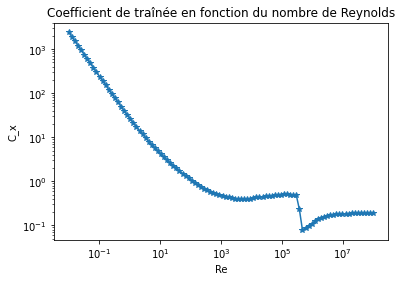

In [95]:
    Re = np.logspace(-2,8,100)
    plt.loglog(Re, Cx(Re),'*-')
    plt.xlabel('Re')
    plt.ylabel('C_x')
    plt.title('Coefficient de traînée en fonction du nombre de Reynolds')
    plt.show()

### Mise en forme des données

On dispose tout d'abord d'un ensemble de données numériques constantes

In [96]:
  # Donnees physiques
  rhoa = 1.2 # masse volumique de l’air @ 25 °C (kg/m^3)
  rhoe = 1.0e3 # masse volumique de l'eau (kg/m^3)
  nu = 1.6e-5 # viscosite cinématique de l’air @ 25 °C (m^2/s)
  g = 9.8 # accélération de la pesanteur (m/s^2)
  R = 7.5e-5 # rayon de la goutte d'eau (m)

Afin de représenter la trajectoire, il faut disposer des valeurs de la coordonnée verticale $z(t)$ qu'on déduit de la valeur de la composante verticale $v_z(t)$ du vecteur vitesse.
On choisit de représenter ces deux quantités dans une liste:
$$
Z = [z,vz]
$$
Cette liste va être nécessaire pour l'appel à la fonction ```odeint```.

### Résolution numérique de l'équation du mouvement

In [97]:
def chutelibre1D(Z, t, rhoa, rhoe, nu, g, R):
    """ système différentiel pour la chute libre 1D avec frottements """
    vz = Z[1]
    vzdot = 0.0
    if np.abs(vz)>0.:
      Re = np.abs(vz*2*R/nu)
      vzdot += g-3./8.*(rhoa/rhoe)*Cx(Re)*(vz**2)/R
    # on renvoie les valeurs des dérivées de z et vz
    return [vz,vzdot]

### Détermination de la vitesse terminale de chute

In [98]:
## conditions initiales
Z0 = 0.
VZ0 = 0.00001 # on est contraint de donner une valeur initiale strictement positive pour que la solution s'amorce.
 

In [99]:
t = np.linspace(0.,1.,1000) # intervalle temporel
init_cond = [Z0,VZ0] # conditions initiales
sol = scint.odeint(chutelibre1D, init_cond, t, args=(rhoa,rhoe, nu, g, R))
Z,VZ, = sol.transpose()

In [100]:
# on calcule le nombre de Reynolds à tout instant au cours de la chute
Re = VZ*2*R/nu

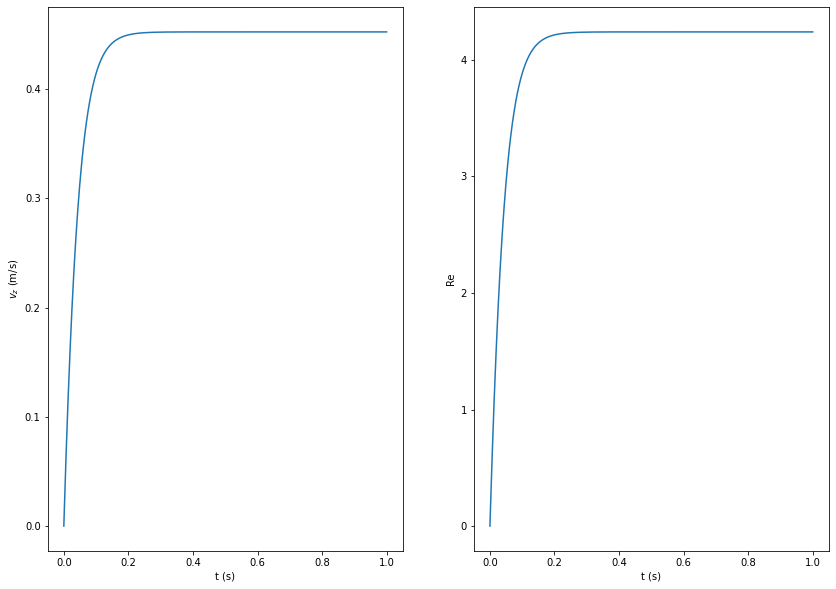

In [101]:
# représentation graphique
figure = plt.figure(figsize=(14, 10))
# On trace un ensemble de graphes rangés selon 1 lignes et 2 colonnes
plt.subplot(1,2,1)
plt.plot(t,VZ)
plt.xlabel('t (s)')
plt.ylabel('$v_z$ (m/s)')

plt.subplot(1,2,2)
plt.plot(t,Re)
plt.xlabel('t (s)')
plt.ylabel('Re')

plt.show()

In [102]:
# Extraction de la valeur terminale de chute de la goutte
vterm = np.max(VZ)
print("Valeur de la vitesse terminale = %.2e m/s" % vterm)

Valeur de la vitesse terminale = 4.52e-01 m/s


Il est intéressant de constater que le nombre de Reynolds évolue au cours du mouvement. Il devient assez vite supérieur à l'unité. On en conclut que la modélisation de l'action mécanique de l'air par la force de Stokes $\vec{f}=-6\pi\eta R\vec{v}$, où $\eta$ est la viscosité dynamique du fluide, acceptable seulement pour $\mathrm{Re}<1$, n'est pas cohérente. Bien que très couramment utilisée pour résoudre le problème posé, elle livre une valeur de la vitesse terminale (0,61 m/s) éloignée de celle qui vient d'être calculée.

## Modélisation du mouvement d'une balle de golf dans le champ de pesanteur terrestre

### Mise en équation

Une situation bidimensionnelle, plus complexe, est maintenant proposée.

On étudie le mouvement d'une balle de golf, modélisée par une boule de rayon $R$ et de masse $m$, soumise à l'action du champ de pesanteur terrestre, supposé uniforme et noté $\vec{g}$, et à l'action de l'air.
L'action mécanique de l'air sur la balle de golf est modélisée, comme précédemment, par une force de traînée $\vec{f}=-\frac{1}{2}\rho S C_x v\vec{v}$, où $v$ est la norme de la vitesse $\vec{v}$ de la balle (par rapport au fluide, l'air, supposé immobile dans le référentiel terrestre galiléen), $\rho$ la masse volumique de l'air, $S$ la "surface projetée" de la balle (autrement appelée *maître-couple*) et $C_x$ le coefficient de traînée qui est fonction du nombre de Reynolds $Re = \frac{v(2R)}{\nu}$ où $\nu$ est la viscosité cinématique de l'air.

L'équation différentielle qui régit le mouvement de la balle est donnée par la seconde loi de Newton:

$$
m\frac{\mathrm{d}\vec{v}}{\mathrm{d}t}=-\frac{1}{2}\rho S C_x v\vec{v}-m\vec{g}\,.
$$

### Résolution numérique de l'équation du mouvement

On commence par projeter l'équation du mouvement sur l'axe horizontal ($Ox$) et vertical ($Oz$):

$$
m\frac{\mathrm{d}v_x}{\mathrm{d} t}=-\frac{1}{2}\rho S C_x vv_x\,,
$$
$$
m\frac{\mathrm{d}v_z}{\mathrm{d} t}=-\frac{1}{2}\rho S C_x vv_z-mg\,.
$$

#### Mise en forme des données

On dispose tout d'abord d'un ensemble de données numériques constantes

In [103]:
  # Donnees physiques
  rho = 1.2 # masse volumique de l’air @ 25 °C (kg/m^3)
  nu = 1.6e-5 # viscosite cinématique de l’air @ 25 °C (m^2/s)
  g = 9.8 # accélération de la pesanteur (m/s^2)
  R = 0.0225 # rayon de la balle de golf (m)
  m = 0.0450 # masse d'une balle de golf (kg)
  S = np.pi*R**2 # maître-couple (m^2)

Afin de représenter la trajectoire, il faut disposer des valeurs des coordonnées horizontale $x(t)$ et verticale $z(t)$ qu'on déduit des valeurs des composantes horizontale $v_x(t)$ et verticale $v_z(t)$ du vecteur vitesse.
On choisit de représenter ces quatre quantités dans une liste:
$$
X = [x,vx,z,vz]
$$

On a tout d'abord besoin d'une fonction qui calcule la norme de la vitesse à partir des composantes $v_x$ et $v_z$

In [104]:
def norme(vx,vz):
  return(np.sqrt(vx**2+vz**2))

On doit maintenant définir une fonction qui renvoit les valeurs instantanées de $\dot{x}(t)$, $\dot{v_x(t)}$, $\dot{z}(t)$ et $\dot{v_z(t)}$. Cette fonction définit le système différentiel qui sera résolu par ```odeint```.

 

In [105]:
def chutelibre(X, t, rho, nu, g, R, m, S):
    """ système différentiel pour la chute libre 2D avec frottements """
    vx = X[1]
    z = X[2]
    vz = X[3]
    v = norme(vx,vz)
    # Si la vitesse verticale est orientée vers le bas et si l'altitude est proche de 0 : le projectile a atteint le sol et doit s'immobiliser
    if (vz <=0) and (z<=0.001):
      vxdot = 0.0
      vzdot = 0.0   
    elif np.abs(v) >0:
        # Reynolds
        Re = np.abs(v*2*R/nu)
        vxdot = -1./2.*rho*S*Cx(Re)*v*vx /m
        vzdot = -g-1./2.*rho*S*Cx(Re)*v*vz /m
    # on renvoie les valeurs des dérivées de x, vx, z et vz
    return [vx,vxdot,vz,vzdot]

#### Calcul numérique de la trajectoire

In [106]:
## Conditions initiales
V0 = 40.
angle = 40.

In [107]:
  t = np.linspace(0.,10.,1000) # intervalle temporel
  init_cond = [0.,V0*np.cos(angle/180*np.pi),0.,V0*np.sin(angle/180*np.pi)] # conditions initiales
  sol = scint.odeint(chutelibre, init_cond, t, args=(rho, nu, g, R, m, S))
  X,VX,Z,VZ, = sol.transpose()

In [108]:
# On retire les points d'altitude négative en utilisant un masque
# le masque est un tableau de même taille que Z dont chaque élément
# vaut True ou False selon que l'élément correspondant de Z vérifie ou pas la condition
masque = Z >= 0
# On utilise ce masque pour ne garder dans les tableaux X, Z, VX, VZ et t que les éléments qui correspondent à la valeur
# True de l'élément correspondant du masque
X = X[masque]
Z = Z[masque]
VX = VX[masque]
VZ = VZ[masque]
t = t[masque]
# on calcule le nombre de Reynolds en chaque point de la trajectoire
Reynolds = norme(VX,VZ)*2*R/nu

In [109]:
# on calcule la trajectoire ballistique sans frottements (Galilée)
abscisse = np.linspace(0.,V0**2/g*np.sin(2*angle/180*np.pi),200)
altitude = -0.5*g*(abscisse/(V0*np.cos(angle/180*np.pi)))**2+abscisse*np.tan(angle/180*np.pi)

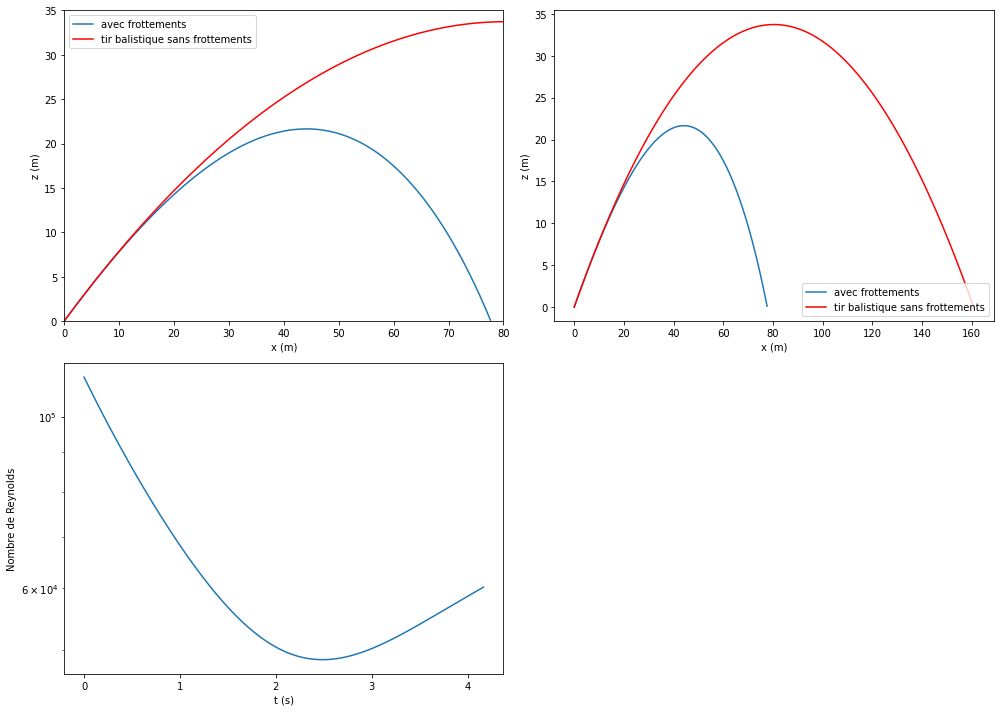

In [110]:
# Représentations graphiques
fig = plt.figure(figsize=(14, 10))
# On trace un ensemble de graphes rangés selon 2 lignes et 2 colonnes
plt.subplot(2,2,1)
plt.plot(X,Z,label='avec frottements')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.plot(abscisse,altitude,'r-',label='tir balistique sans frottements')
# on ne prend qu'un intervalle limité en abscisse pour visualiser le début des trajectoires
plt.axis([0.,80.,0.,35.])
plt.legend()

plt.subplot(2,2,2)
plt.plot(X,Z,label='avec frottements')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.plot(abscisse,altitude,'r-',label='tir balistique sans frottements')
plt.legend()

plt.subplot(2,2,3)
plt.semilogy(t,Reynolds)
plt.xlabel('t (s)')
plt.ylabel('Nombre de Reynolds')

fig.tight_layout()
plt.show()

Il est instructif de comparer cette trajectoire à la trajectoire parabolique telle qu'elle fut établie par Galilée. On constate qu'au début du mouvement, les deux trajectoires sont proches. La trajectoire avec frottements n'est pas symétrique par rapport au sommet, comme c'est le cas pour la trajectoire parabolique caractéristique d'un tir balistique sans frottements. L'action mécanique de l'air conduit à une diminution progressive de la vitesse horizontale: il en résulte que le mouvement se rapproche de plus en plus d'une chute verticale. La trajectoire modélisée n'est pas sans rappeler les trajectoires imaginées par le mathématicien italien Niccolo Tartaglia qui esquisse en 1537 dans son manuscrit *La nova Scientia* les trajectoires
des boulets de canon (voir ci-après).



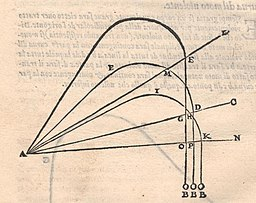

Niccolo Tartaglia. *Nova Scientia*, 1537.

La portée obtenue dans cette modélisation a un ordre de grandeur tout à fait compatible avec ce que l'on peut observer dans la réalité. Par ailleurs, la modélisation numérique montre que le nombre de Reynolds varie sensiblement au cours du mouvement. L'approche numérique apporte ainsi une véritable plus-value à cette étude.

### Optimisation du tir

On propose de calculer la portée du tir en fonction de l'angle afin d'estimer la valeur de l'angle qui correspond à une portée maximale, pour une vitesse donnée. Seule une approche numérique permet de réaliser cette étude.

In [111]:
portee = []
V0 = 40. # ordre de grandeur courant de la vitesse initiale d'une balle de golf

In [112]:
# on définit un intervalle d'angles de tir
angle = np.linspace(1.,89.,200)
# pour chaque valeur de l'angle de tir, on recherche la valeur de la portée et on la stocke dans la liste portee
for alpha in angle:
  # intervalle temporel
  t = np.linspace(0,10,1000)
  # conditions initiales
  init_cond = [0.,V0*np.cos(alpha/180*np.pi),0.,V0*np.sin(alpha/180*np.pi)] 
  # on appelle la fonction odeint pour résoudre le système différentiel
  sol = scint.odeint(chutelibre, init_cond, t, args=(rho, nu, g, R, m, S))
  # on récupère les valeurs numériques
  X,VX,Z,VZ, = sol.transpose()
  # On retire les points d'altitude négative en utilisant un masque
  # le masque est un tableau de même taille que Z dont chaque élément
  # vaut True ou False selon que l'élément correspondant de Z vérifie ou pas la condition
  masque = Z >= 0.0
  # On utilise ce masque pour ne garder dans les tableaux X et Z que les éléments qui correspondent à la valeur
  # True de l'élément correspondant du masque
  X = X[masque]
  Z = Z[masque]
  # On ajoute à la liste portee la valeur maximale de l'abscisse X
  portee.append(np.max(X))

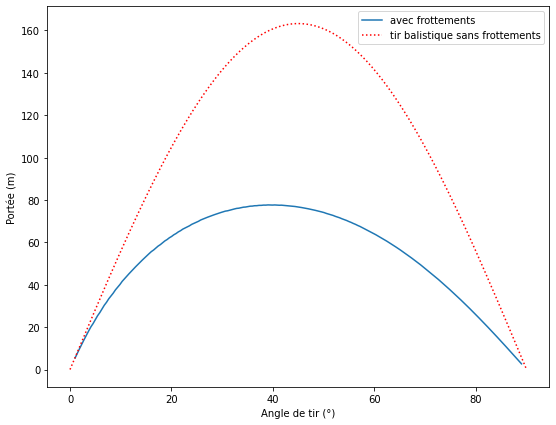

In [113]:
# portée du tir balistique sans frottements (Galilée)
agl = np.linspace(0,90,1000)
portee_balistique = V0**2/g*np.sin(2*agl/180*np.pi)
# représentation graphique
plt.figure(figsize=(9, 7))
plt.plot(angle,portee,label='avec frottements')
plt.plot(agl,portee_balistique,'r:',label='tir balistique sans frottements')
plt.xlabel('Angle de tir (°)')
plt.ylabel('Portée (m)')
plt.legend()
plt.show()

Dans le cas d'un tir balistique sans frottements correspondant à une vitesse initiale de norme $V_0=40\,\mathrm{m}\cdot\mathrm{s}^{-1}$, la portée maximale est obtenue pour un angle de tir de 45° et vaut $\frac{V_0^2}{g}=163,3\,\mathrm{m}$.
La modélisation présentée ici montre que la prise en compte des frottements limite la portée de façon très sensible. On constate aussi qu'en présence de frottements [la portée maximale est obtenue pour un angle inférieur à 40°.](https://www.refletsdelaphysique.fr/articles/refdp/pdf/2012/01/refdp201228p10.pdf)

### La "mur" aérodynamique

Pour un angle de tir de 37°, on cherche maintenant à savoir comment évolue la portée du tir en fonction de la vitesse de tir.

In [114]:
portee=[]
angle = 37
Vmax = 100.

In [115]:
# on définit un intervalle de vitesses de tir
vitesse = np.linspace(0.,Vmax,100)
# pour chaque valeur de la vitesse de tir, on recherche la valeur de la portée et on la stocke dans la liste portee
for Vzero in vitesse:
  # intervalle temporel
  t = np.linspace(0,10,1000)
  # conditions initiales
  init_cond = [0.,Vzero*np.cos(angle/180*np.pi),0.,Vzero*np.sin(angle/180*np.pi)] 
  # on appelle la fonction odeint pour résoudre le système différentiel
  sol = scint.odeint(chutelibre, init_cond, t, args=(rho, nu, g, R, m, S))
  # on récupère les valeurs numériques
  X,VX,Z,VZ, = sol.transpose()
  # On retire les points d'altitude négative en utilisant un masque
  # le masque est un tableau de même taille que Z dont chaque élément
  # vaut True ou False selon que l'élément correspondant de Z vérifie ou pas la condition
  masque = Z >= 0.0
  # On utilise ce masque pour ne garder dans les tableaux X et Z que les éléments qui correspondent à la valeur
  # True de l'élément correspondant du masque
  X = X[masque]
  Z = Z[masque]
  # On ajoute à la liste portee la valeur maximale de l'abscisse X
  portee.append(np.max(X))

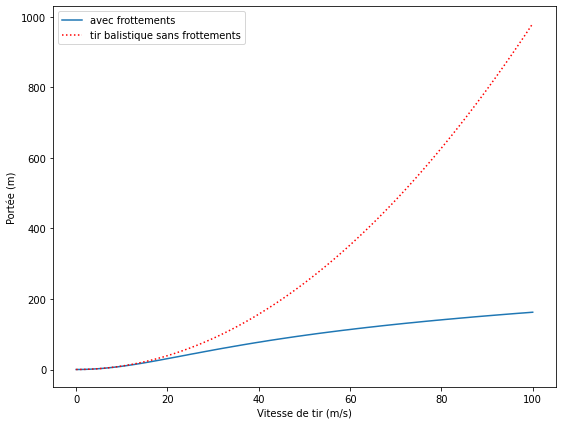

In [116]:
# portée du tir balistique sans frottements (Galilée)
speed = np.linspace(0,Vmax,100)
portee_balistique = speed**2/g*np.sin(2*angle/180*np.pi)
# représentation graphique
plt.figure(figsize=(9, 7))
plt.plot(vitesse,portee,label='avec frottements')
plt.plot(speed,portee_balistique,'r:',label='tir balistique sans frottements')
plt.xlabel('Vitesse de tir (m/s)')
plt.ylabel('Portée (m)')
plt.legend()
plt.show()

In [117]:
print("La portée du tir pour V= %2.1f m/s est égale à %2.1f m"%(speed[9],portee[9]))
print("La portée du tir pour V= %2.1f m/s est égale à %2.1f m"%(speed[39],portee[39]))

La portée du tir pour V= 9.1 m/s est égale à 7.6 m
La portée du tir pour V= 39.4 m/s est égale à 76.2 m


La portée maximale croît avec la vitesse de tir, mais nettement moins rapidement qu'en l'absence de frottements. L'appellation ["mur aérodynamique"](https://hal.archives-ouvertes.fr/tel-01083862/document) traduit cette réduction de la portée du tir: les valeurs numériques ci-dessus montrent bien qu'un facteur 4 sur la vitesse de tir ne se traduit pas par un facteur 16 sur la portée comme le prédit le modèle sans frottement. Cet effet est bien connu des joueurs de badminton qui savent qu'il est vain de frapper plus fort le volant dans le but d'augmenter sensiblement la portée de sa trajectoire.